In [1]:
import numpy as np
import cv2
from PIL import Image
from os import listdir
import os
import matplotlib.pyplot as plt

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [3]:
path = "Full/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 24108
100_0_0_20170112213500903.jpg


In [4]:
images = []
ages = []
genders = []
races = []
for file in files:
    image = cv2.imread(path+file)
    faces = face_cascade.detectMultiScale(image, 1.3, 5)
    if len(faces) > 0:
        for (x, y, w, h) in faces:
            
            detected_face = image[int(y):int(y + h), int(x):int(x + w)]
            detected_face = cv2.resize(detected_face, dsize=(112,112))
        images.append(detected_face)
        split_var = file.split('_')
    try:
        races.append(int(split_var[2]))
        ages.append(int(split_var[0]))
        genders.append(int(split_var[1]))
        images.append(image)
    except:
        pass
        

In [5]:
len(ages), len(images)

(19912, 19912)

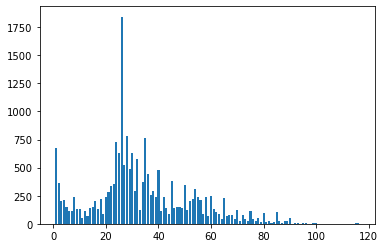

Max value: 116


In [6]:
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Max value:",max(ages))

In [7]:
images = np.array(images,dtype='float32')
ages = np.array(ages,dtype = 'float32')

In [ ]:
images = images.astype('float32')
images /= 255.0

In [ ]:
def age_group(age):
    if age >= 0 and age < 18:
        return 0
    elif age >= 18 and age < 30:
        return 1
    elif age >= 30 and age < 60:
        return 2
    else:
        return 3
    
for i in range(len(ages)):
    ages[i] = age_group(int(ages[i]))

In [ ]:
ages = np_utils.to_categorical(ages, 4)
genders = np_utils.to_categorical(genders, 2)
races = np_utils.to_categorical(races, 5)

In [ ]:
np.save('images.npy', images)
np.save('ages.npy', ages)
np.save('genders.npy', genders)
np.save('races.npy', races)